In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1. Replace NaN values with correct value. And Justify why you have chosen the same.

In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dataset.fillna({"salary": 0}, inplace=True)

In [6]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# 2. How many of them are not placed?

In [7]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
placement_counts=dataset['status'].value_counts()

In [9]:
placed_counts=placement_counts.get('Placed',0)
nonplaced_counts=placement_counts.get('Not Placed',0)

In [10]:
placed_counts

148

In [11]:
nonplaced_counts

67

# 3. Find the reason for non placement from the dataset.

In [12]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [13]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [14]:
# Create a new column 'average_academic_score' by calculating the mean of the academic scores
dataset['average_academic_score'] = dataset[['ssc_p', 'hsc_p', 'degree_p', 'mba_p']].mean(axis=1)

# Display all relevant columns for all students
output_columns = ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'average_academic_score']

# Set display options to show all rows and avoid truncation
pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.float_format', '{:.4f}'.format)  # Format floats to 4 decimal places

# Display the dataset
print(dataset[output_columns])


     sl_no   ssc_p   hsc_p  degree_p   mba_p  average_academic_score
0        1 67.0000 91.0000   58.0000 58.8000                 68.7000
1        2 79.3300 78.3300   77.4800 66.2800                 75.3550
2        3 65.0000 68.0000   64.0000 57.8000                 63.7000
3        4 56.0000 52.0000   52.0000 59.4300                 54.8575
4        5 85.8000 73.6000   73.3000 55.5000                 72.0500
5        6 55.0000 49.8000   67.2500 51.5800                 55.9075
6        7 46.0000 49.2000   79.0000 53.2900                 56.8725
7        8 82.0000 64.0000   66.0000 62.1400                 68.5350
8        9 73.0000 79.0000   72.0000 61.2900                 71.3225
9       10 58.0000 70.0000   61.0000 52.2100                 60.3025
10      11 58.0000 61.0000   60.0000 60.8500                 59.9625
11      12 69.6000 68.4000   78.3000 63.7000                 70.0000
12      13 47.0000 55.0000   65.0000 65.0400                 58.0100
13      14 77.0000 87.0000   59.00

In [15]:
# By analysing the dataset,
# Calculating the average academic score of each student using 10th,12th,degree pass mark and MBA pass mark
# Students who mostly got average academic score less than 65 are not not placed. Some are exceptional.

# 4. What kind of relation between salary and mba_p?

In [16]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,average_academic_score
sl_no,1.0000,-0.0782,-0.0857,-0.0883,0.0636,0.0223,0.0025,-0.0852
ssc_p,-0.0782,1.0000,0.5115,0.5384,0.2620,0.3885,0.5381,0.8381
hsc_p,-0.0857,0.5115,1.0000,0.4342,0.2451,0.3548,0.4526,0.8037
degree_p,-0.0883,0.5384,0.4342,1.0000,0.2245,0.4024,0.4084,0.7506
etest_p,0.0636,0.2620,0.2451,0.2245,1.0000,0.2181,0.1870,0.3123
mba_p,0.0223,0.3885,0.3548,0.4024,0.2181,1.0000,0.1398,0.6247
salary,0.0025,0.5381,0.4526,0.4084,0.1870,0.1398,1.0000,0.5399
average_academic_score,-0.0852,0.8381,0.8037,0.7506,0.3123,0.6247,0.5399,1.0000


In [17]:
#Relation between Salary and mba_p states that it is a positive correlation -- if mba_p increases salary also increases by 13.98%

# 5. Which specialisation getting minimum salary?

In [18]:
# Calculate the average salary for each specialization
average_salary_by_specialization = dataset.groupby('specialisation')['salary'].mean().reset_index()

# Rename the columns for better clarity
average_salary_by_specialization.columns = ['specialisation', 'average_salary']

# Display the average salary for each specialization
print(average_salary_by_specialization)


  specialisation  average_salary
0        Mkt&Fin     236591.6667
1         Mkt&HR     150842.1053


# 6. How many of them getting salary above 500000 salary?

In [19]:
salary_count=(dataset['salary']>500000).value_counts()

In [20]:
salary_count

salary
False    212
True       3
Name: count, dtype: int64

In [21]:
salary_count=(dataset['salary']>500000).sum()

In [22]:
salary_count

3

# 7. Test the analysis of variance between etest_p and mba_p at significant level 5%. Make decision using hypothesis test.

In [23]:
# Null hypothesis : There is no similarity between Entrance pass mark of male and MBA pass mark of male

In [24]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['gender']=='M']['etest_p']
male1=dataset[dataset['gender']=='M']['mba_p']
ttest_ind(male,male1)

TtestResult(statistic=9.769476769523118, pvalue=1.4864321021205937e-19, df=276.0)

In [25]:
# p value = 1.486, which is greater than 0.05 so accept null hypothesis and reject alternate hypothesis.

In [26]:
# Null hypothesis : There is no similarity between Entrance pass mark of female and MBA pass mark of female

In [27]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
female=dataset[dataset['gender']=='F']['etest_p']
female1=dataset[dataset['gender']=='F']['mba_p']
ttest_ind(female,female1)

TtestResult(statistic=3.6162534564121036, pvalue=0.0004076255473308725, df=150.0)

In [28]:
# p value = 0.0004, which is lesser than 0.05 so reject null hypothesis and accept altenate hypothesis

# 8. Test the similarity between degree_t (Sci & Tech) and specilisation (Mkt & HR) with respect to salary at significant level 5% (Use Hypothesis testing)

In [29]:
# Null hypothesis : There is no similarity between salary of department of Sci & Tech and salary of specilisation of Mkt&HR

In [30]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
department=dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(department,specialisation)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [31]:
# p value = 0.007, which is greater than 0.05 so accept Null hypothesis and reject alternate hypothesis

# 9. Convert normal distribution to standard normal distribution for salary columns.

In [32]:
def stdNBgraph(dataset):
    #converted to standard normal distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\Rayen Subhikha\AppData\Local\Temp\ipykernel_2440\3030396073.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


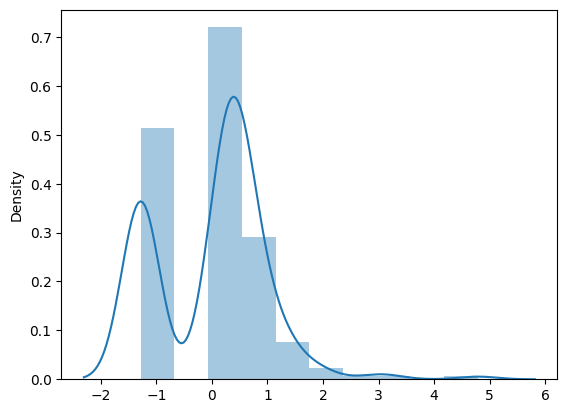

In [33]:
stdNBgraph(dataset['salary'])

# 10. What is the Probability Density Function of the salary range from 700000 to 900000?

In [34]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%3f,Standard Deviation=%3f'%(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in range(startrange,endrange)]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\Rayen Subhikha\AppData\Local\Temp\ipykernel_2440\3877855356.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.325581,Standard Deviation=154780.926716
The area between range(700000,900000):0.0005973310593974868


0.0005973310593974868

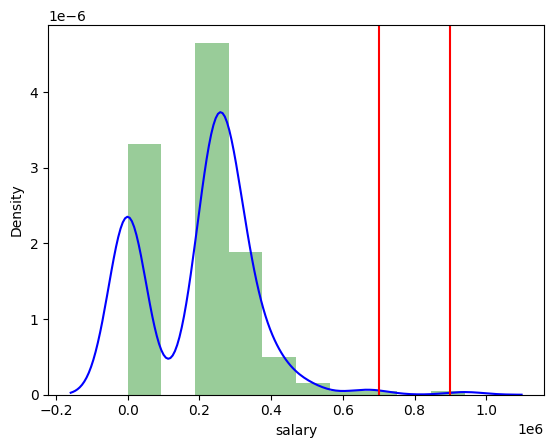

In [35]:
get_pdf_probability(dataset["salary"],700000,900000)

# 11. Test the similarity between degree_t (Sci&Tech) with respect to etest_p and mba_p at significant level 5%. Make decision using Hypothesis Testing.

In [36]:
# Null hypothesis : There is no similarity between entrance test mark of Science&Technology department and MBA pass mark of Science&Technology department.

In [37]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
entrance=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_ind(entrance,mba)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

In [38]:
# p value is 1.4289, which is greater than 0.005. So accept Null Hypothesis and reject alternate hypothesis

# 12. Which parameter is highly correlation with salary?

In [39]:
dataset.drop("average_academic_score",inplace=True,axis=1)

In [40]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.0000,Others,91.0000,Others,Commerce,58.0000,Sci&Tech,No,55.0000,Mkt&HR,58.8000,Placed,270000.0000
1,2,M,79.3300,Central,78.3300,Others,Science,77.4800,Sci&Tech,Yes,86.5000,Mkt&Fin,66.2800,Placed,200000.0000
2,3,M,65.0000,Central,68.0000,Central,Arts,64.0000,Comm&Mgmt,No,75.0000,Mkt&Fin,57.8000,Placed,250000.0000
3,4,M,56.0000,Central,52.0000,Central,Science,52.0000,Sci&Tech,No,66.0000,Mkt&HR,59.4300,Not Placed,0.0000
4,5,M,85.8000,Central,73.6000,Central,Commerce,73.3000,Comm&Mgmt,No,96.8000,Mkt&Fin,55.5000,Placed,425000.0000
5,6,M,55.0000,Others,49.8000,Others,Science,67.2500,Sci&Tech,Yes,55.0000,Mkt&Fin,51.5800,Not Placed,0.0000
6,7,F,46.0000,Others,49.2000,Others,Commerce,79.0000,Comm&Mgmt,No,74.2800,Mkt&Fin,53.2900,Not Placed,0.0000
7,8,M,82.0000,Central,64.0000,Central,Science,66.0000,Sci&Tech,Yes,67.0000,Mkt&Fin,62.1400,Placed,252000.0000
8,9,M,73.0000,Central,79.0000,Central,Commerce,72.0000,Comm&Mgmt,No,91.3400,Mkt&Fin,61.2900,Placed,231000.0000
9,10,M,58.0000,Central,70.0000,Central,Commerce,61.0000,Comm&Mgmt,No,54.0000,Mkt&Fin,52.2100,Not Placed,0.0000


In [41]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.0000,-0.0782,-0.0857,-0.0883,0.0636,0.0223,0.0025
ssc_p,-0.0782,1.0000,0.5115,0.5384,0.2620,0.3885,0.5381
hsc_p,-0.0857,0.5115,1.0000,0.4342,0.2451,0.3548,0.4526
degree_p,-0.0883,0.5384,0.4342,1.0000,0.2245,0.4024,0.4084
etest_p,0.0636,0.2620,0.2451,0.2245,1.0000,0.2181,0.1870
mba_p,0.0223,0.3885,0.3548,0.4024,0.2181,1.0000,0.1398
salary,0.0025,0.5381,0.4526,0.4084,0.1870,0.1398,1.0000


In [42]:
# 10th pass mark has highly correlated with salary as it is a positive correlation and it increases by 53.81%.

# 13. Plot any useful graph and explain it.

In [43]:
import seaborn as sns

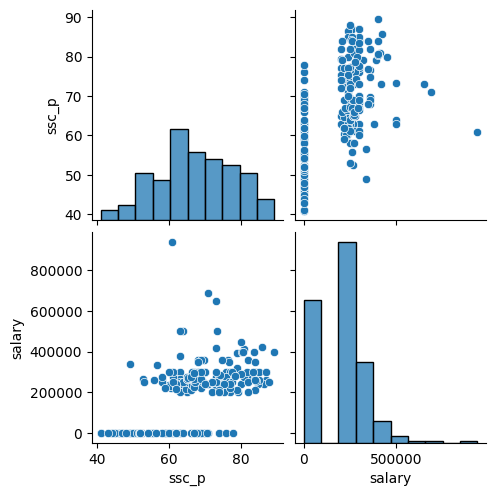

In [44]:
sns.pairplot(dataset[['ssc_p','salary']])

In [45]:
# pairplot is used to analyse data in pictorial representation. Here, we create graph for 2 columns - ssc_p and salary.
# For combination of salary vs ssc_p it shows as low degree of positive correlation.
# For combination of ssc_p vs salary, it shows as low degree of negative correlation.